In [1]:
# codeing=UTF8
import random

class TicTacToe():
    def __init__(self):
        #Initialize each variables
        self.table = [" " for x in range(10)]
        self.turn = None
        # win, lose, tie, mark
        self.cpu1 = [0, 0, 0, 'O'] 
        self.cpu2 = [0, 0, 0, 'X']
    
    def resetTable(self):
        self.table = [" " for x in range(10)]
        
    def getRandomFirst(self):
        # self.turn number is a 0 or 1 value 
        # odd numbers: cpu1 is first, cpu2 is second
        # even numbers: cpu1 is second, cpu2 is first
        self.turn = random.randrange(0, 2)
            
    def printTable(self, bo):
        print('   |   |')
        print(' ' + bo[1] + ' | ' + bo[2] + ' | ' + bo[3])
        print('   |   |')
        print('-----------')
        print('   |   |')
        print(' ' + bo[4] + ' | ' + bo[5] + ' | ' + bo[6])
        print('   |   |')
        print('-----------')
        print('   |   |')
        print(' ' + bo[7] + ' | ' + bo[8] + ' | ' + bo[9])
        print('   |   |')
        
    def isTableFull(self, bo):
        if bo.count(' ') > 1:
            return False
        else:
            return True
    
    def isWinner(self, bo, le):
        return ((bo[7] == le and bo[8] == le and bo[9] == le) or
        (bo[4] == le and bo[5] == le and bo[6] == le) or
        (bo[1] == le and bo[2] == le and bo[3] == le) or
        (bo[7] == le and bo[4] == le and bo[1] == le) or
        (bo[8] == le and bo[5] == le and bo[2] == le) or
        (bo[9] == le and bo[6] == le and bo[3] == le) or
        (bo[7] == le and bo[5] == le and bo[3] == le) or 
        (bo[9] == le and bo[5] == le and bo[1] == le)) 

    def insertTable(self, letter, pos):
        self.table[pos] = letter
    
    def minimax(self, bo, depth, isMaximizing, alpha, beta, let):
        if let == 'X':
            if self.isWinner(bo, 'O'):
                return -10
            if self.isWinner(bo, 'X'):
                return 10
            if self.isTableFull(bo) or depth == 0:
                return 0 
        
            if isMaximizing :
                bestscore = -999
                for cell in range(1, 10):
                    if bo[cell] == ' ':
                        bo[cell] = 'X' 
                        score = self.minimax(bo, depth - 1, False, alpha, beta, let)
                        bo[cell] = ' '
                        if score > bestscore:
                            bestscore = score
                        if bestscore > alpha:
                            alpha = bestscore
                        if beta <= alpha:
                            break
               
                return bestscore

            else :
                bestscore = 999
                for cell in range(1, 10):
                    if bo[cell] == ' ':
                        bo[cell] = 'O'
                        score = self.minimax(bo, depth - 1, True, alpha, beta, let)
                        bo[cell] = ' '
                        if score < bestscore:
                            bestscore = score
                        if bestscore < beta:
                            beta = bestscore
                        if beta <= alpha:
                            break
                return bestscore
        else:
            if self.isWinner(bo, 'O'):
                return 10
            if self.isWinner(bo, 'X'):
                return -10
            if self.isTableFull(bo) or depth == 0:
                return 0 
            
            if isMaximizing :
                bestscore = -999
                for cell in range(1, 10):
                    if bo[cell] == ' ':
                        bo[cell] = 'O' 
                        score = self.minimax(bo, depth - 1, False, alpha, beta, let)
                        bo[cell] = ' '
                        if score > bestscore:
                            bestscore = score
                        if bestscore > alpha:
                            alpha = bestscore
                        if beta <= alpha:
                            break
               
                return bestscore

            else :
                bestscore = 999
                for cell in range(1, 10):
                    if bo[cell] == ' ':
                        bo[cell] = 'X'
                        score = self.minimax(bo, depth - 1, True, alpha, beta, let)
                        bo[cell] = ' '
                        if score < bestscore:
                            bestscore = score
                        if bestscore < beta:
                            beta = bestscore
                        if beta <= alpha:
                            break
                return bestscore
            

    def compMove(self, letter):
        bestscore = -999
        possibleMoves = [x for x, letter in enumerate(self.table) if letter == ' ' and x != 0]
        bestmove = 0
        bo = []
        for cell in range(10):
            bo.append(self.table[cell])
            
        for moves in possibleMoves:
            #print('-------------' + str(moves) + "--------------" )
            bo[moves] = letter
            score = self.minimax(bo, len(possibleMoves), False, -999, 999, letter)
            bo[moves] = " "
            #print(score)
            if score > bestscore:
                bestscore = score
                bestmove = moves
                
        #print(str(bestmove) + " : " + str(bestscore))
        if bestmove != 0:
            self.insertTable(letter, bestmove)
    
    def playCPUvsCPU(self):
        print('Welcome to the Tic Tac Toe Game')
        # Match 100 Games
        for i in range(1000):
            self.resetTable()
            self.getRandomFirst()
            #self.printTable(self.table)

            WinFlag = True
            while WinFlag:
                # Check the curent table state:
                for let in['O', 'X']:
                    if self.isWinner(self.table, let):
                        if let == 'O':
                            # CPU1 Win : CPU2 Lose  
                            print('cpu1 O s win this time')
                            self.cpu1[0] = self.cpu1[0] + 1
                            self.cpu2[1] = self.cpu2[1] + 1
                            WinFlag = False
                            
                        else :
                            # CPU1 Lose : CPU2 Win
                            print('cpu2 X s win this time')
                            self.cpu1[1] = self.cpu1[1] + 1
                            self.cpu2[0] = self.cpu2[0] + 1
                            WinFlag = False
                            
                # Draw Game: Table is Full
                if self.isTableFull(self.table) and WinFlag:
                    self.cpu1[2] = self.cpu1[2] + 1
                    self.cpu2[2] = self.cpu2[2] + 1 
                    WinFlag = False
                    
                # Next Action
                if WinFlag:
                    if self.turn % 2 == 0:
                        self.compMove('O')
                    else :
                        self.compMove('X')
                    #self.printTable(self.table)
                self.turn = self.turn + 1    

In [2]:
if __name__ == "__main__":
    tic = TicTacToe()
    tic.playCPUvsCPU()

Welcome to the Tic Tac Toe Game


In [3]:
# Print each score (Win, Lose, Tie) in tic.cpu1 and tic.cpu2
# Win is [0] index's element
# Lose is [1] index's element
# Tie is [2] index's element
print(tic.cpu1)
print(tic.cpu2)

[0, 0, 1000, 'O']
[0, 0, 1000, 'X']


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
score1 = np.zeros((3, ), dtype=int)
score2 = np.zeros((3, ), dtype=int)
score1[0] = tic.cpu1[0]
score1[1] = tic.cpu1[1]
score1[2] = tic.cpu1[2]
score2[0] = tic.cpu2[0]
score2[1] = tic.cpu2[1]
score2[2] = tic.cpu2[2]

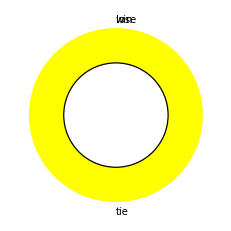

In [6]:
#Score1(CPU!)
# Red is "Win" color
# Blue is "Lose" color
# Yellow is "Tie" color
label = ["win", "lose", "tie"]
colors = ["red", "blue", "yellow"]
plt.pie(score1, labels=label, counterclock=False, startangle=90, colors=colors)
centre_circle = plt.Circle((0,0),0.6,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

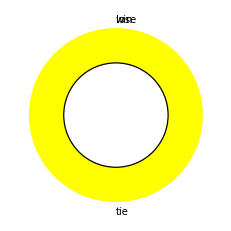

In [7]:
#Score2(CPU2)
label = ["win", "lose", "tie"]
colors = ["red", "blue", "yellow"]
plt.pie(score2, labels=label, counterclock=False, startangle=90, colors=colors)
centre_circle = plt.Circle((0,0),0.6,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)